In [54]:
import argparse

from typing import List, Tuple, Optional

import math
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
varnum = 4

In [32]:
variants = [
    '''17,1 21,4 15,9 19,1 22,4 20,7 17,9 18,6 21,8 16,1 19,1 20,5 14,2 16,9 17,8 18,1
19,1 15,8 18,8 17,2 16,2 17,3 22,5 19,9 21,1 15,1 17,7 19,8 14,9 20,5 17,5 19,2
18,5 15,7 14,0 18,6 21,2 16,8 19,3 17,8 18,8 14,3 17,1 19,5 16,3 20,3 17,9 23,0
17,2 15,2 15,6 17,4 21,3 22,1 20,1 14,5 19,3 18,4 16,7 18,2 16,4 18,7 14,3 18,2
19,1 15,3 21,5 17,2 22,6 20,4 22,8 17,5 20,2 15,5 21,6 18,1 20,5 14,0 18,9 16,5
20,8 16,6 18,3 21,7''',
    '''189 207 213 208 186 210 198 219 231 227 202 211 220 236 227 220 210 183 213
190 197 227 187 226 213 191 209 196 202 235 211 214 220 195 182 228 202 207
192 226 193 203 232 202 215 195 220 233 214 185 234 215 196 220 203 236 225
221 193 215 204 184 217 193 216 205 197 203 229 204 225 216 233 223 208 204
207 182 216 191 210 190 207 205 232 222 198 217 211 201 185 217 225 201 208
211 189 205 207 199''',
    '''9,4 7,9 0,3 6,8 4,2 11,9 7,8 1,7 5,1 8,8 8,7 11,1 7,7 1,8 5,5 10,5 4,3 3,8 1,4 11,2 1,1
7,3 3,7 4,4 11,8 8,6 1,9 5,6 10,1 8,4 10,0 11,6 5,2 2,1 5,7 4,8 7,4 0,8 4,7 3,6 8,3 7,6
0,7 7,3 3,4 11,4 5,7 9,9 2,2 7,2 2,3 4,7 9,7 7,3 5,8 4,9 3,3 0,5 7,5 4,6 5,0 0,4 8,9 7,1
9,6 11,5 5,9 9,0 5,3 2,4 9,5 5,9 1,0 9,1 2,5 6,0 8,2 3,2 10,9 6,1 10,2 2,6 4,5 3,1 6,2
11,7 6,3 0,2 7,0 9,2 1,2 6,4 11,9 6,9 8,1 6,5 2,9 6,2 4,4 10,3''',
    '''1,6 4,4 10,9 6,4 4,0 2,8 5,2 1,2 7,6 3,4 2,9 5,3 1,7 7,7 6,9 10,1 5,4 4,1 8,8 6,5 6,6
4,2 5,5 0,5 8,9 4,5 1,8 5,6 7,8 3,0 1,9 10,2 7,9 2,5 5,7 3,1 6,7 4,3 0,6 9,0 6,8 3,2 4,4
9,1 10,3 6,0 7,9 6,9 8,0 2,0 7,0 10,7 8,1 2,1 5,8 6,4 0,3 4,5 9,2 3,3 7,6 9,3 3,4 4,6
5,0 3,8 5,9 8,2 2,2 7,1 2,3 0,8 7,2 8,3 11,1 6,5 3,5 9,4 10,8 4,7 4,8 6,1 3,6 9,5 8,4
2,4 6,2 7,3 5,7 0,9 7,4 8,5 5,8 1,1 5,9 4,9 3,7 9,6 2,6 6,1''',
    '''20 26 32 34 26 28 22 30 17 24 30 28 18 22 24 26 34 28 22 20 34 24 28 20 32 17
22 24 26 30 30 22 26 35 28 24 30 32 28 18 20 30 17 24 32 28 22 26 24 30 34 26
24 28 22 30 35 32 20 17 28 22 36 30 20 26 28 23 24 32 20 26 30 24 32 17 22 28
35 26 28 35 32 22 26 24 26 24 30 24 18 24 26 28 35 30 26 22 26 28''']

variant = list(map(float, variants[varnum].replace(',', '.').split()))
variant.sort()

In [33]:
display(variant)

[17.0,
 17.0,
 17.0,
 17.0,
 17.0,
 18.0,
 18.0,
 18.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 20.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 23.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 26.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 28.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 32.0,
 34.0,
 34.0,
 34.0,
 34.0,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 36.0]

# Задание 1

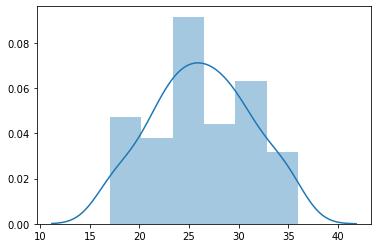

In [52]:
sns_plot = sns.distplot(variant)
fig = sns_plot.get_figure()

In [36]:
def build_ladder(data: List[Tuple[float, int]], elements_number: int, label: Optional[str] = None):
    '''\
    build_graph принимает на вход: `data` - список пар (координата `x`, количество точек)

    `elements_number` - количество элементов

    `label` - название графика
    
    Как результат работы, рисует график распределения величин, где по оси `y` откладываются количество элементов относительно общего количества.
    '''
    eps: float = 1e-5
    xs: List[float] = [data[0][0] - (data[-1][0] - data[0][0]) / 20, data[0][0], data[0][0] + eps]
    ys: List[float] = [0.0, 0.0, data[0][1] / elements_number]
    for i in range(1, len(data)):
        xs.append(data[i][0])
        ys.append(data[i - 1][1] / elements_number)
        xs.append(data[i][0] + eps / 2)
        ys.append(0.0)
        xs.append(data[i][0] + eps)
        ys.append(data[i][1] / elements_number)
    xs.append(data[-1][0] + eps / 2)
    ys.append(0.0)
    xs.append(data[-1][0] + eps)
    ys.append(data[-1][1] / elements_number)
    xs.append(data[-1][0] + (data[-1][0] - data[0][0]) / 20)
    ys.append(data[-1][1] / elements_number)

    custom_ticks = np.linspace(data[0][0], data[-1][0], 15, dtype=float)
    custom_ticks_labels = list(map(lambda tick: f'{tick:.2f}', custom_ticks))
    plt.gca().set_xticks(custom_ticks)
    plt.gca().set_xticklabels(custom_ticks_labels)

    plt.plot(xs, ys, label=label)

def build_graph(data: List[Tuple[float, int]], label: Optional[str] = None):
    '''\
    build_graph принимает на вход: `data` - список пар (координата `x`, количество точек)

    `label` - название графика

    Как результат работы, рисует график распределения величин, где по оси `y` откладываются количество элементов относительно общего количества.
    '''
    eps: float = 1e-5
    if len(data) < 2:
        return
    min_dist: float = data[1][0] - data[0][0]
    elements_number: int = data[0][1] + data[1][1]
    for i in range(2, len(data)):
        elements_number += data[i][1]
        if data[i][0] - data[i - 1][0] < min_dist:
            min_dist = data[i][0] - data[i - 1][0]
    min_dist /= 4
    xs: List[float] = [data[0][0] - min_dist * 2]
    ys: List[float] = [0.0]
    for tup in data:
        xs.append(tup[0] - min_dist - eps)
        ys.append(0.0)
        xs.append(tup[0] - min_dist)
        ys.append(tup[1] / elements_number)
        xs.append(tup[0] + min_dist)
        ys.append(tup[1] / elements_number)
        xs.append(tup[0] + min_dist + eps)
        ys.append(0.0)
    xs.append(data[-1][0] + min_dist * 2)
    ys.append(0.0)

    plt.plot(xs, ys, label=label)
    
    pass

In [46]:
histogram_bins = 6

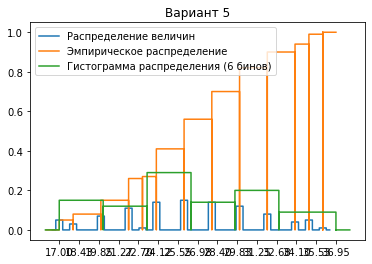

In [47]:
counting: List[Tuple[float, int]] = []
for el in variant:
    if len(counting) > 0 and counting[-1][0] == el:
        counting[-1] = (el, counting[-1][1] + 1)
    else:
        counting.append((el, 1))
empirial: List[Tuple[float, int]] = counting.copy()
for i in range(1, len(empirial)):
    empirial[i] = (empirial[i][0], empirial[i - 1][1] + empirial[i][1])

build_graph(counting, 'Распределение величин')
# plt.cla()
build_ladder(empirial, len(variant), 'Эмпирическое распределение')
# sns.distplot(variant)
plt.title(f'Вариант {varnum + 1}')
# plt.show()

last_i: int = 0
histogram: List[Tuple[float, int]] = [(0.0, 0)] * histogram_bins
for k in range(histogram_bins):
    i = last_i
    current: int = 0
    while (i < len(counting)):
        if (counting[i][0] < counting[0][0] + (counting[-1][0] - counting[0][0]) / histogram_bins * (k + 1)):
            current += counting[i][1]
        else:
            break
        i += 1
        last_i = i
    histogram[k] = (counting[0][0] + (counting[-1][0] - counting[0][0]) / histogram_bins * k, current)
histogram.append((counting[-1][0] + (counting[-1][0] - counting[0][0]) / 20, 0))
build_ladder(histogram, len(variant), f'Гистограмма распределения ({histogram_bins} бинов)')

plt.legend(fontsize=10)
plt.show()